In [281]:
import pandas as pd
import numpy as np
import os
import pickle
import networkx as nx
import mygene
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import matplotlib.patches as mpatches
import itertools

Important considerations:
* all graphs have the same layout. Except for the graph attributes and node expressions, the nodes and edges are the same! (Same degree for each node, same graph diameter, etc.)

In [282]:
current_directory = os.getcwd()

somepath = os.path.abspath(
    os.path.join(current_directory, '..', 'Data', 'RNA_dataset_graph_R3.pkl'))

# expression data
with open(somepath, 'rb') as f:
    graph_data = pickle.load(f)


### Methods for graph analysis

These two methods compute the degree of every node in the graph so we can make a histogram out of them and know the average connectivity in the graph.

In [283]:
def degree_graph(g):
    nodes = g.nodes
    degrees = []
    for n in nodes:
        degrees += [g.degree[n]]
    return degrees

This method returns the diameter of the graphs, so we can see the average size of the patients

In [284]:
def find_graph_diameter(g):
    return nx.diameter(g)

### TESTING

In [285]:
G = graph_data[0]

In [286]:
list(G.edges)

[('NFKB1', 'TNIP2'),
 ('NFKB1', 'CLTC'),
 ('NFKB1', 'DNAJA1'),
 ('NFKB1', 'MAP2K5'),
 ('NFKB1', 'CFLAR'),
 ('NFKB1', 'ELF3'),
 ('NFKB1', 'NFKB2'),
 ('NFKB1', 'CALM1'),
 ('NFKB1', 'ACTG1'),
 ('NFKB1', 'PAK2'),
 ('NFKB1', 'YY1'),
 ('NFKB1', 'RPS6KA5'),
 ('NFKB1', 'HDAC3'),
 ('NFKB1', 'SMAD4'),
 ('NFKB1', 'GLG1'),
 ('NFKB1', 'CLU'),
 ('NFKB1', 'HTT'),
 ('NFKB1', 'CUL4A'),
 ('NFKB1', 'TPR'),
 ('NFKB1', 'CTNNB1'),
 ('NFKB1', 'TBK1'),
 ('NFKB1', 'BRMS1'),
 ('NFKB1', 'FLNB'),
 ('NFKB1', 'POU2F1'),
 ('NFKB1', 'CHUK'),
 ('NFKB1', 'TSC22D3'),
 ('NFKB1', 'TIMM50'),
 ('NFKB1', 'HSP90AB1'),
 ('NFKB1', 'HSPA8'),
 ('NFKB1', 'NCOA6'),
 ('NFKB1', 'NCOA3'),
 ('NFKB1', 'DSP'),
 ('NFKB1', 'HSPA4'),
 ('NFKB1', 'SPAG9'),
 ('NFKB1', 'VPS26A'),
 ('NFKB1', 'PPARGC1A'),
 ('NFKB1', 'CARM1'),
 ('NFKB1', 'PRKCA'),
 ('NFKB1', 'NCOR1'),
 ('NFKB1', 'XRCC4'),
 ('NFKB1', 'HMGB2'),
 ('NFKB1', 'SP1'),
 ('NFKB1', 'SRF'),
 ('NFKB1', 'CUL3'),
 ('NFKB1', 'RPS13'),
 ('NFKB1', 'BTRC'),
 ('NFKB1', 'BRCA1'),
 ('NFKB1', 'PRKDC'),

In [287]:
G.graph

{'sample_id': 'X00936b9285d6b8665ae9122993fb8e91',
 'PFS_P': 4.1724846,
 'PFS_P_CNSR': 0,
 'MATH': 17.92839117,
 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA': 70.0,
 'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA': 0.0,
 'CD8_POSITIVE_CELLS_TUMOR_CENTER': 0.08,
 'CD8_POSITIVE_CELLS_TOTAL_AREA': 0.1931}

In [288]:
G.nodes['NFKB1']

{'node_attr': 6.1}

### Result section

Histogram with the node degrees. We can see many of them have a low amount of connections (edges)

In [ ]:
G = graph_data[0]

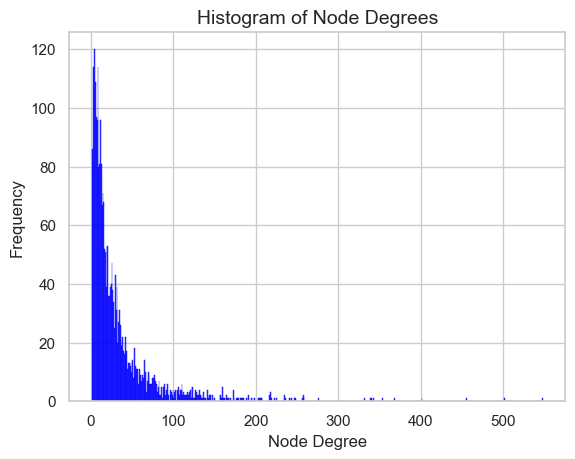

In [210]:
vals = degree_graph(graph_data[0])

sns.set(style="whitegrid")

# Create histogram with seaborn
sns.histplot(vals, bins=range(min(vals), max(vals) + 2), binwidth=1, stat='count', color='blue', edgecolor = 'blue', linewidth=0.3)

# Add labels and title
plt.xlabel('Node Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Node Degrees', fontsize=14)

# Show plot
plt.show()

Graph diameter

In [101]:
# This method is not really that useful, because all graphs should actually have the same diameter
find_graph_diameter(graph_data[0])

6

This plot shows the node degree at a larger scale. Most nodes are very well connected, except a few which don't have many connections.

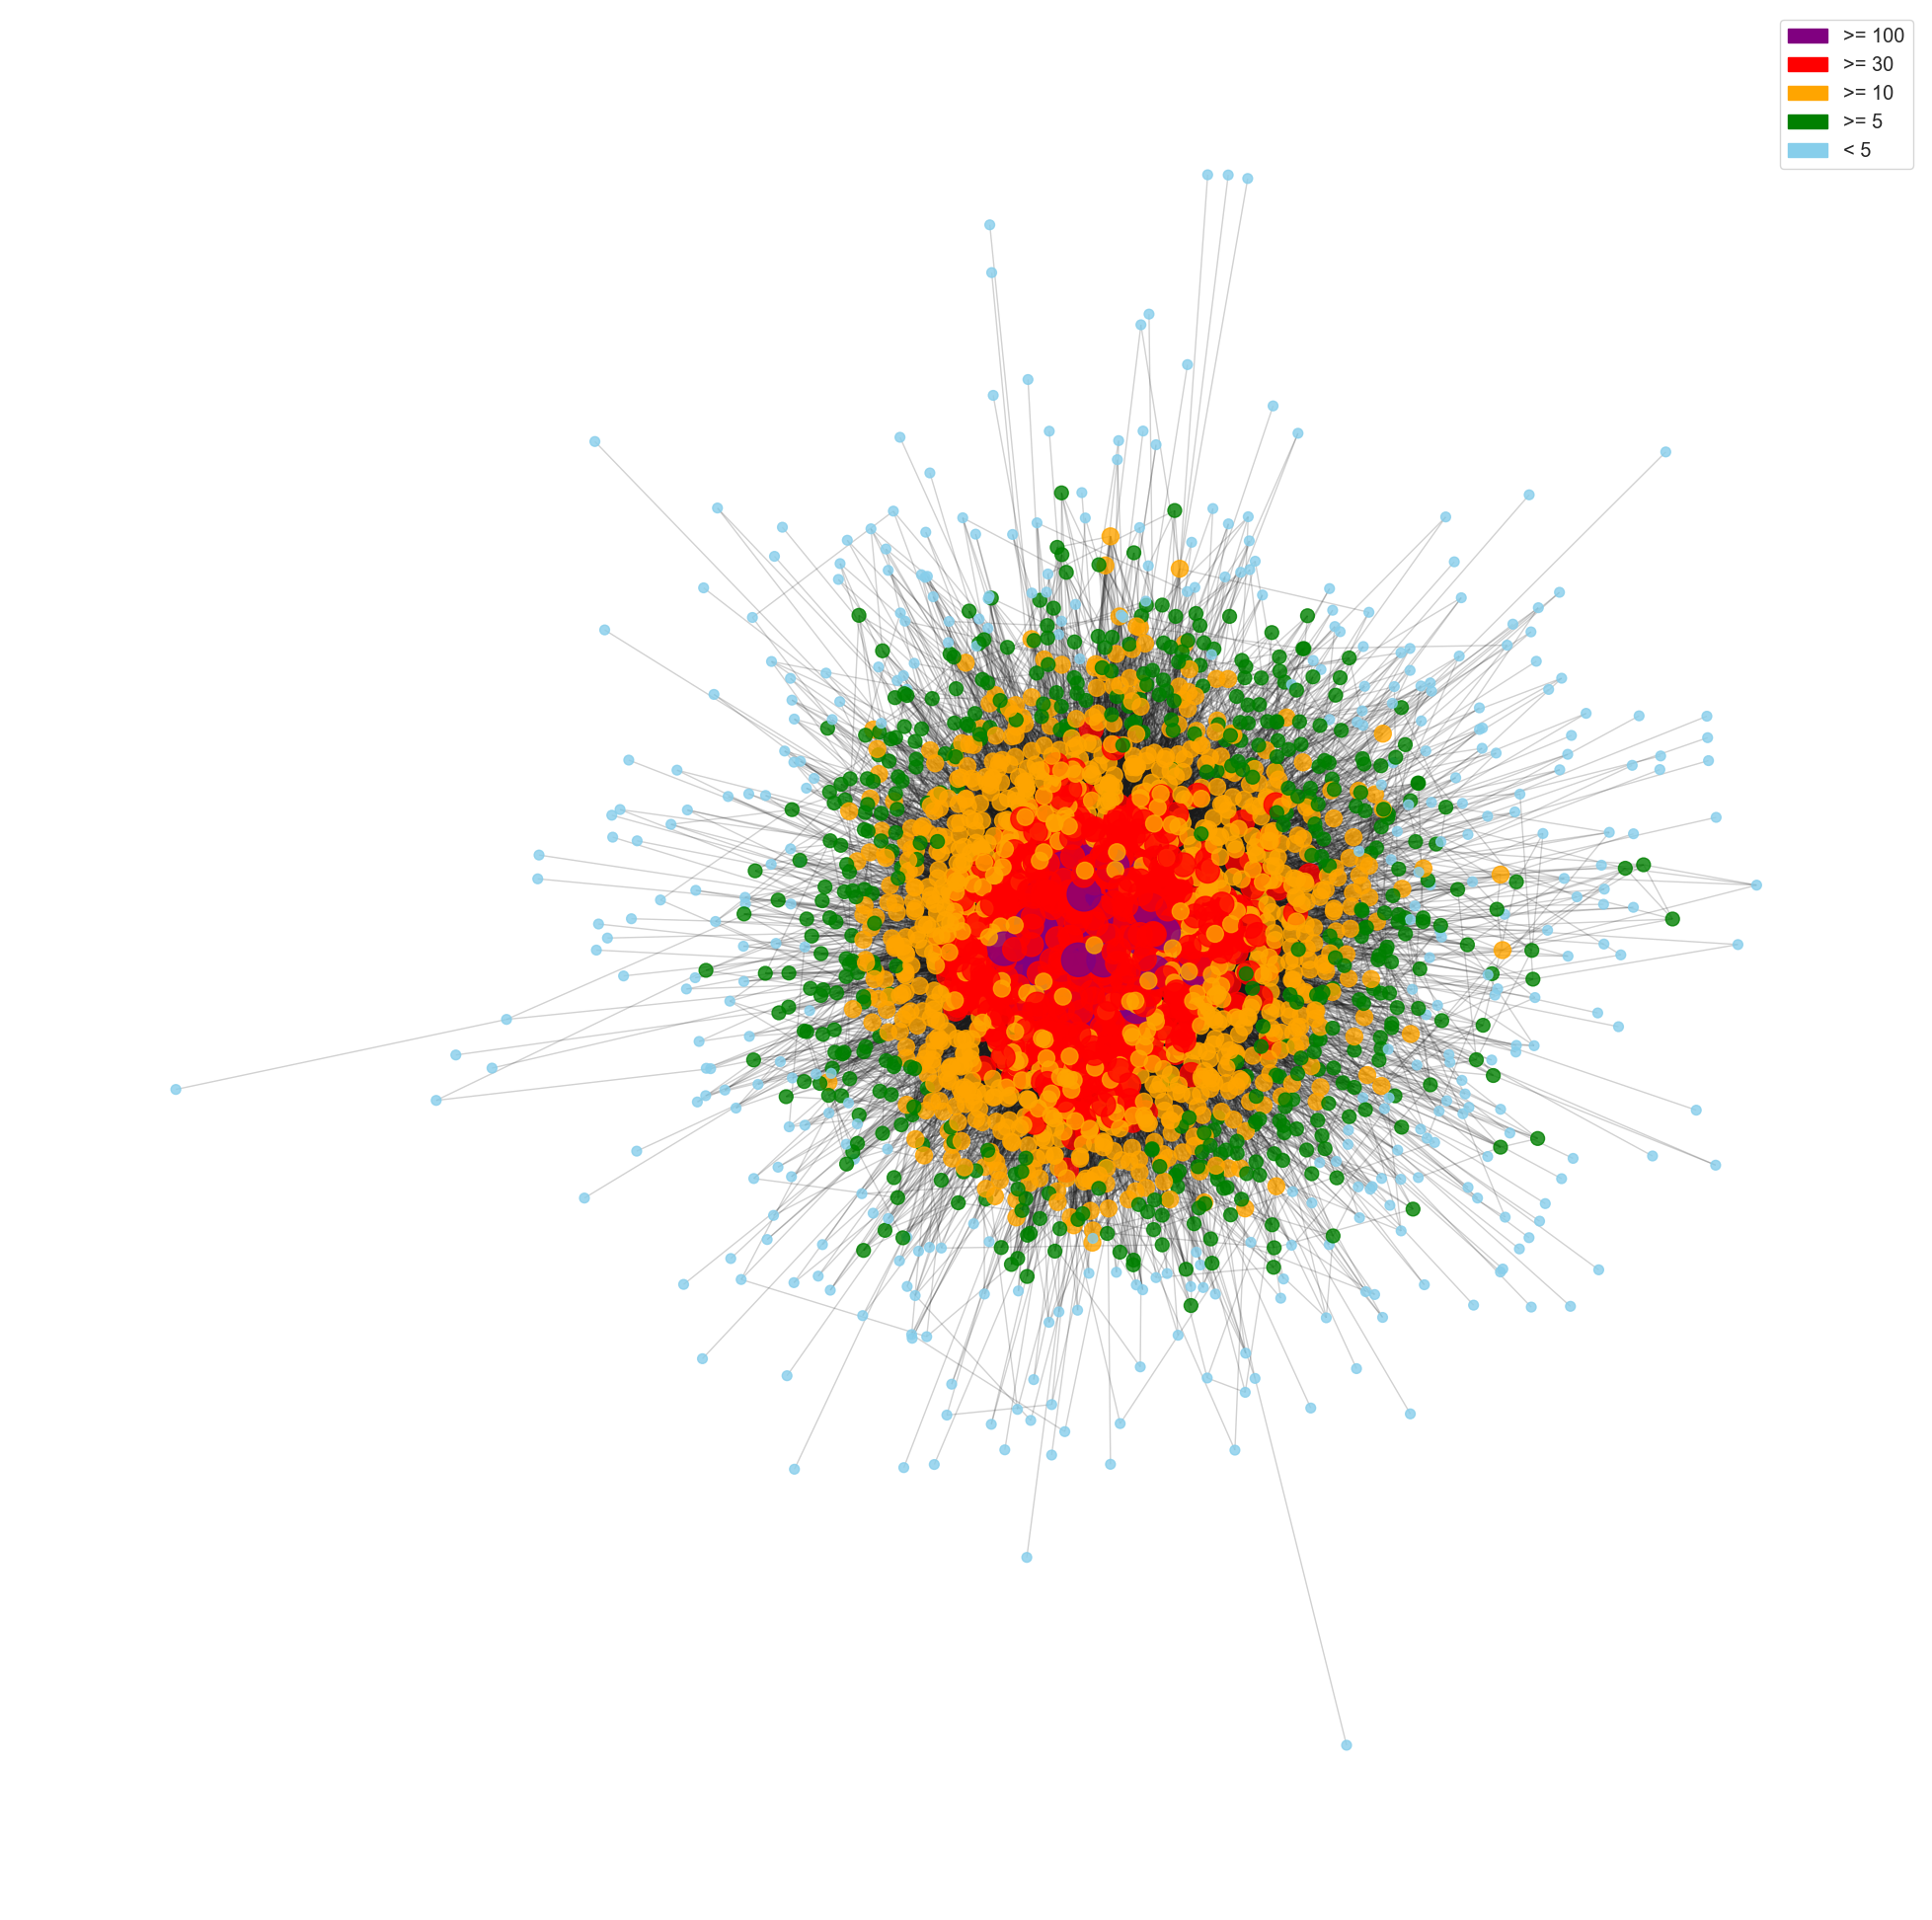

In [160]:
G = graph_data[0]

colors = []
sizes = []
for n in G.nodes():
    if len(list(G.adj[n])) >= 100:
        colors.append('purple')
        sizes.append(600)
    elif len(list(G.adj[n])) >= 30:
        colors.append('red')
        sizes.append(300)
    elif len(list(G.adj[n])) >= 10:
        colors.append('orange')
        sizes.append(150)
    elif len(list(G.adj[n])) >= 5:
        colors.append('green')
        sizes.append(100)
    else:
        colors.append('skyblue')
        sizes.append(50)

# Draw nodes
plt.figure(figsize=(25, 25))
layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos=layout, node_size=sizes, node_color=colors, alpha = 0.8)

# Draw edges with transparency
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)

patches = [
    mpatches.Patch(color = 'purple', label=">= 100"),
    mpatches.Patch(color = 'red', label=">= 30"),
    mpatches.Patch(color = 'orange', label=">= 10"),
    mpatches.Patch(color = 'green', label=">= 5"),
    mpatches.Patch(color = 'skyblue', label="< 5"),
]
plt.legend(handles = patches,fontsize='large')

# Display the plot
plt.axis('off')
plt.show()


This plot shows how removing each bridge creates new components. However, in all cases the new component is only 1 node, therefore it's nothing to worry about.

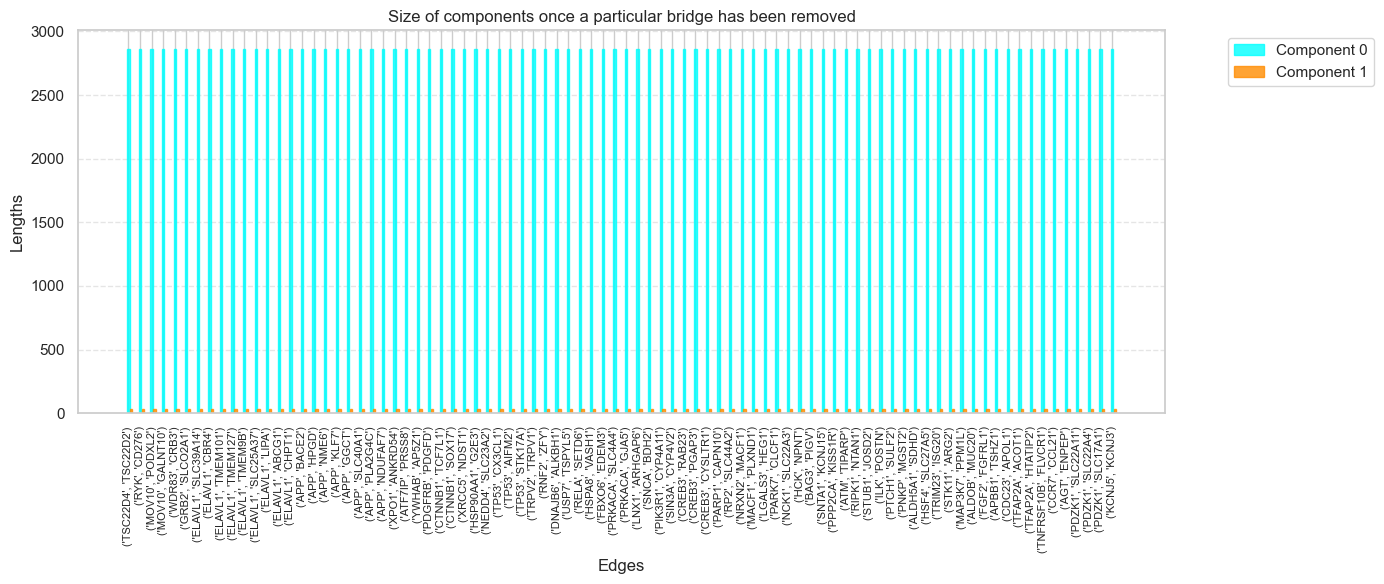

In [278]:
bridge_edges = nx.bridges(graph_data[0])
res = []
for be in bridge_edges:
    tmpGraph = graph_data[0].copy()
    tmpGraph.remove_edges_from([be])
    conn_comp = list(nx.connected_components(tmpGraph))
    lengths = [len(x) for x in conn_comp]
    res += [(be, lengths)]

edges, lengths = ([x[0] for x in res], [x[1] for x in res])
colors = ['cyan', 'darkorange', 'forestgreen']

idxs = np.arange(len(edges))

plt.figure(figsize=(14, 6))

leg = []

for x in idxs:
    for idx_l, l in enumerate(lengths[x]):
        leg += ["Component " + str(idx_l)]
        l_tmp = l
        # if too small, let's make it a bit larger so its visualizable in the graph
        if l < 30:
            l_tmp = 30
        plt.bar(x + (idx_l / len(lengths[x])) / 2, l_tmp, color=colors[idx_l], edgecolor=colors[idx_l], alpha=.8, width=0.4 / len(lengths[x]), label="Component " + str(idx_l) if x == 0 else "") # Adjusted parameters for bar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(idxs, edges, rotation = 90, fontsize = 8)
plt.xlabel('Edges') 
plt.ylabel('Lengths') 
plt.title('Size of components once a particular bridge has been removed')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


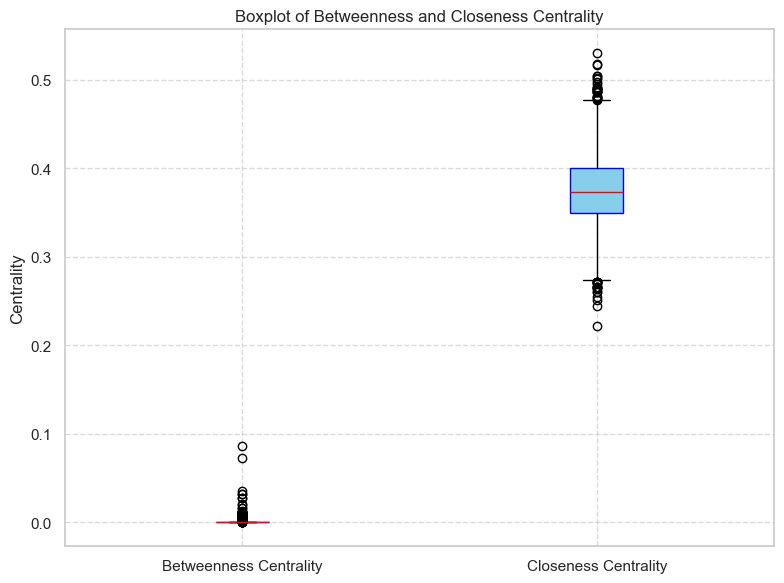

In [311]:
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

betweenness = []
closeness = []

# Betweeness measures the extent to which a node lies on the shortest paths between other nodes in the network.
# [0;1] = 1 means it has a large influence on the flow of information through the network, as many shortest paths pass through it.
for node, centrality in betweenness_centrality.items():
    betweenness += [centrality]

# Closeness measures how close a node is to all other nodes in the network, on average. 
# A node with high closeness is able to quickly interact with other nodes in the network.
# [0;1] = 1 means that the node is closest to all other nodes in the network.

for node, centrality in closeness_centrality.items():
    closeness += [centrality]

plt.figure(figsize=(8, 6))

plt.boxplot([betweenness, closeness], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), medianprops=dict(color='red'))

plt.xticks([1, 2], ['Betweenness Centrality', 'Closeness Centrality'])
plt.ylabel('Centrality')
plt.title('Boxplot of Betweenness and Closeness Centrality')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()